In [3]:
import torch
import torch.nn as nn

In [6]:
"""
So imagine we have a sentence with up to 10 tokens,
and each token embedding has 6 features (numbers).
"""
max_sequence_length = 10  # how many positions (tokens) in one sequence
d_model = 6               # dimension of each embedding vector

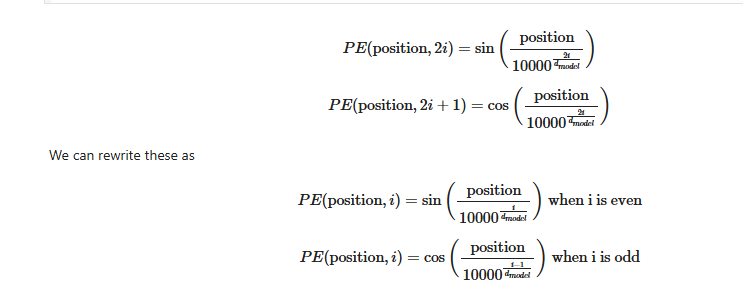

In [7]:
"""
Why?
Because for even dimensions we’ll use sin(),
and for odd dimensions we’ll use cos().

This pattern (sin for even, cos for odd) helps the model easily learn relative positions.
"""

even_i = torch.arange(0, d_model, 2).float()  # -> [0., 2., 4.]
odd_i = torch.arange(1, d_model, 2).float()   # -> [1., 3., 5.]

In [9]:
print(even_i)
print(odd_i)

tensor([0., 2., 4.])
tensor([1., 3., 5.])


In [11]:
"""
This line creates scaling factors like:

[1.0000, 21.5443, 464.1590]

This means:
The first dimension changes quickly (short wavelength)
The last dimension changes slowly (long wavelength)
→ So each dimension captures position at a different frequency.
"""

denominator = torch.pow(10000, even_i / d_model)

In [12]:
"""
Each row = one token’s position in the sequence.
"""

position = torch.arange(max_sequence_length, dtype=torch.float).reshape(max_sequence_length, 1)
position

tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]])

In [13]:
"""
Example result (first few):

even_PE[1] ≈ [0.8415, 0.0464, 0.0022]
odd_PE[1]  ≈ [0.5403, 0.9989, 1.0000]

These values are small wave-like numbers between -1 and 1.
"""

even_PE = torch.sin(position / denominator)
odd_PE  = torch.cos(position / denominator)

In [14]:
"""
We now interleave even and odd columns,
so final vector = [sin(0), cos(0), sin(1), cos(1), sin(2), cos(2)]

That gives shape [10, 6] — meaning:

10 positions (tokens)

each with a 6-dimensional positional vector

✅ Final positional encoding matrix:

tensor([[ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000],
        [ 0.8415,  0.5403,  0.0464,  0.9989,  0.0022,  1.0000],
        ...
])
"""

stacked = torch.stack([even_PE, odd_PE], dim=2)
PE = torch.flatten(stacked, start_dim=1, end_dim=2)


In [15]:
import torch
import torch.nn as nn

class PositionalEncoding(nn.Module):

    def __init__(self, d_model, max_sequence_length):
        super().__init__()
        self.max_sequence_length = max_sequence_length
        self.d_model = d_model

    def forward(self):
        even_i = torch.arange(0, self.d_model, 2).float()
        denominator = torch.pow(10000, even_i/self.d_model)
        position = torch.arange(self.max_sequence_length).reshape(self.max_sequence_length, 1)
        even_PE = torch.sin(position / denominator)
        odd_PE = torch.cos(position / denominator)
        stacked = torch.stack([even_PE, odd_PE], dim=2)
        PE = torch.flatten(stacked, start_dim=1, end_dim=2)
        return PE

In [16]:
pe = PositionalEncoding(d_model=6, max_sequence_length=10)
pe.forward()

tensor([[ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000],
        [ 0.8415,  0.5403,  0.0464,  0.9989,  0.0022,  1.0000],
        [ 0.9093, -0.4161,  0.0927,  0.9957,  0.0043,  1.0000],
        [ 0.1411, -0.9900,  0.1388,  0.9903,  0.0065,  1.0000],
        [-0.7568, -0.6536,  0.1846,  0.9828,  0.0086,  1.0000],
        [-0.9589,  0.2837,  0.2300,  0.9732,  0.0108,  0.9999],
        [-0.2794,  0.9602,  0.2749,  0.9615,  0.0129,  0.9999],
        [ 0.6570,  0.7539,  0.3192,  0.9477,  0.0151,  0.9999],
        [ 0.9894, -0.1455,  0.3629,  0.9318,  0.0172,  0.9999],
        [ 0.4121, -0.9111,  0.4057,  0.9140,  0.0194,  0.9998]])